In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import ascii

In [107]:
indir = '/Users/yaolun/Google Drive/proposal/ALMA/cycle4/models/'
m1 = ascii.read(indir+'/Model2/hcoptx.1.ta', data_start=4, names=['v1','t1','v2','t2'])
m2 = ascii.read(indir+'/Model3/hcoptx.1.ta', data_start=4, names=['v1','t1','v2','t2'])
m3 = ascii.read(indir+'/Model4/hcoptx.1.ta', data_start=4, names=['v1','t1','v2','t2'])

# noise
# 30 mJy = 4.0036 K, according to OT
t_noise = 2.0036
# noise = np.random.normal(0, 4.0036, 127)

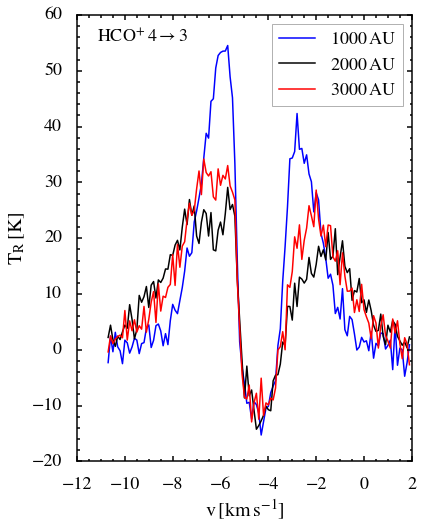

In [118]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)

one, = ax.plot(m1['v2'], m1['t2']+np.random.normal(0, t_noise, 127), 'b-', linewidth=1.5)
two, = ax.plot(m2['v2'], m2['t2']+np.random.normal(0, t_noise, 127), 'k-', linewidth=1.5)
# two.set_dashes([8, 4, 2, 4, 2, 4]) 
three, = ax.plot(m3['v2'], m3['t2']+np.random.normal(0, t_noise, 127), 'r-', linewidth=1.5)

ax.text(0.06,0.94, r'$\rm{HCO^{+}\,4\rightarrow 3}$', fontsize=18, transform=ax.transAxes)

ax.legend([one, two, three],
          [r'$\rm{1000\,AU}$', r'$\rm{2000\,AU}$', r'$\rm{3000\,AU}$'],
          fontsize=18, numpoints=1, loc='upper right', framealpha=0.3)

ax.set_xlabel(r'$\rm{v\,[km\,s^{-1}]}$',fontsize=20)
ax.set_ylabel(r'$\rm{T_{R}\,[K]}$',fontsize=20)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/Dropbox/ALMA_cy4_bhr71/hcop4-3_15mJy.pdf', format='pdf', dpi=300, bbox_inches='tight')

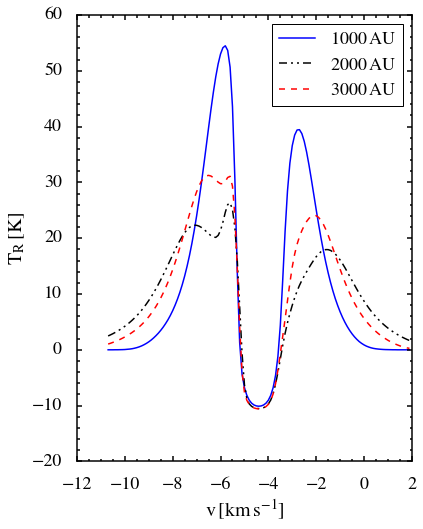

In [106]:
fig = plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)

one, = ax.plot(m1['v2'], m1['t2'], 'b-', linewidth=1.5)
two, = ax.plot(m2['v2'], m2['t2'], 'k-', linewidth=1.5)
two.set_dashes([8, 4, 2, 4, 2, 4]) 
three, = ax.plot(m3['v2'], m3['t2'], 'r--', linewidth=1.5)

ax.legend([one, two, three],
          [r'$\rm{1000\,AU}$', r'$\rm{2000\,AU}$', r'$\rm{3000\,AU}$'],
          fontsize=18, numpoints=1, loc='upper right')

ax.set_xlabel(r'$\rm{v\,[km\,s^{-1}]}$',fontsize=20)
ax.set_ylabel(r'$\rm{T_{R}\,[K]}$',fontsize=20)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)


### For APEX

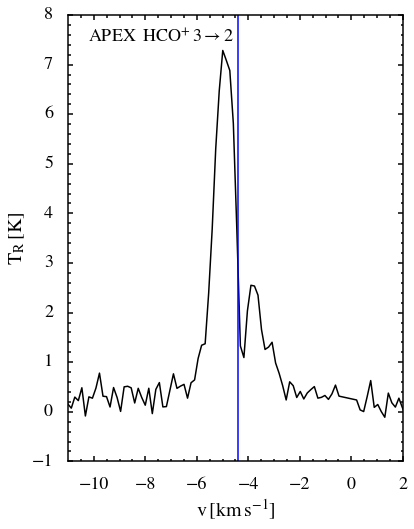

In [114]:
filename = '/Users/yaolun/bhr71/data/single_dish_TB/hcop32.gr'
hco32 = ascii.read(filename, names=['v','t'])

fig= plt.figure(figsize=(6,8))
ax = fig.add_subplot(111)

ax.plot(hco32['v'], hco32['t'], 'k-', linewidth=1.5)
ax.axvline(-4.4, color='b', linestyle='-', linewidth=1.5)
ax.text(0.06,0.94, r'$\rm{APEX\,\,\,HCO^{+}\,3\rightarrow 2}$', fontsize=18, transform=ax.transAxes)
ax.set_xlim([-11,2])

ax.set_xlabel(r'$\rm{v\,[km\,s^{-1}]}$',fontsize=20)
ax.set_ylabel(r'$\rm{T_{R}\,[K]}$',fontsize=20)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)

fig.savefig('/Users/yaolun/Dropbox/ALMA_cy4_bhr71/apex_hco32.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [121]:
# function for converying K to Jy or vice versa
def kjy(brightness, unit, freq, beam=0.27):
    if unit == 'Jy':
        k = brightness * 13.6 * (3e11/freq)**2/beam**2
        print '%.3f Jy = %.3f K at %.0f GHz and %.2f beam' % (brightness, k, freq/1e9, beam)
    
    if unit == 'mJy':
        k = brightness*1e-3 * 13.6 * (3e11/freq)**2/beam**2
        print '%.3f mJy = %.3f K at %.0f GHz and %.2f beam' % (brightness, k, freq/1e9, beam)
    
    if unit == 'K':
        jy = brightness * beam**2 * (freq/3e11)**2/13.6
        print '%.1f K = %.3f Jy at %.0f GHz and %.2f beam' % (brightness, jy, freq/1e9, beam)

In [123]:
kjy(5, 'mJy', 345e9)
kjy(19.53, 'K', 345e9)
kjy(6, 'K', 345e9)
kjy(0.53, 'Jy', 225e9, beam=1.25)

5.000 mJy = 0.705 K at 345 GHz and 0.27 beam
19.5 K = 0.138 Jy at 345 GHz and 0.27 beam
6.0 K = 0.043 Jy at 345 GHz and 0.27 beam
0.530 Jy = 8.201 K at 225 GHz and 1.25 beam
